<a href="https://colab.research.google.com/github/alphakilo11/Python/blob/main/performance/wip_20221004_prime_generators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from timeit import default_timer as timer
from matplotlib import pyplot as plt
import sympy
import math

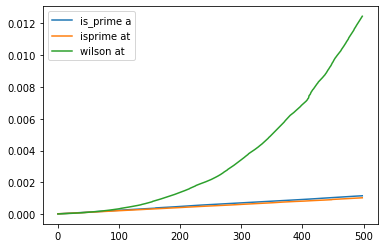

In [41]:
def is_prime(number):
  """ returns True if given integer is a prime number. Works only with odd number greater than 2"""
  for divisor in range(3, math.ceil(number ** (1/2) + 1), 2):
    if number % divisor == 0:
      return False
  else:
    return True

def wilson(number):
  if (math.factorial(number - 1) + 1) % number == 0:
    return True
  else:
    return False

def performance_measure(list_of_functions, iterations):
  fig, ax = plt.subplots()
  for function in list_of_functions:
    start_time = timer()
    y = []
    for i in range(3, iterations, 2):
      function(i)
      y.append(timer() - start_time)
    x = range(len(y))
    labeltext = str(function)[10:20]
    ax.plot(x, y, label=labeltext)
  ax.legend()

performance_measure((is_prime, sympy.isprime, wilson), int(1e3))

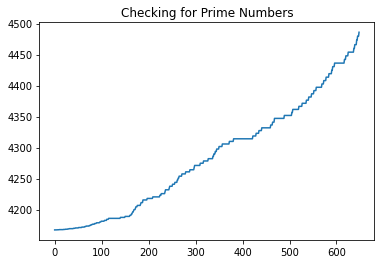

325.24311532699994


In [ ]:
#Variant using the list of primes as divisors to search for new prime numbers
#VERY SLOW!!!
def list_of_primes(length):
  if length < 1:
    return None
  list_of_divisors = [2]
  number = 3
  ys = []
  while len(list_of_divisors) < length:
    if len(list_of_divisors) % 1000 == 0:
      ys.append(timer())
    reject = False
    for divisor in list_of_divisors:
      if number % divisor == 0:
        reject = True
        break
    if not reject:
      list_of_divisors.append(number)
    number += 2
  x = range(len(ys))
  plt.plot(x, ys, '-')
  plt.title("Checking for Prime Numbers")
  plt.show()
  return list_of_divisors

start = timer()
foo = list_of_primes(100000)
print(timer() - start)